In [ ]:
datapath  = '../Desktop/landsat_hires.nc'


In [ ]:
import xarray as xr
ds = xr.open_dataset(datapath)

In [63]:
import landsat_sample_functions as lf
tempK = lf.BT(ds['Thermal Radiances'], 10.9,1)
tempF = 9/5*(tempK -273) + 32

In [64]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


# NDVI Histograms

## 
this NDVI is calculated by first taking the
difference of the amount of near Infrared light reflected by the area and the amount of red
light reflected by the same area. This difference is then divided by the sum of the two
previous values which yields the final result. If more much NIR is reflected than
Red Light(as in most healthy plants), then the NDVI will be closer to one; This is known as a high
NDVI. Because unhealthy plants or heavily spaced plants generally have less chlorophyll per
area than healthy plants or closely spaced plants, they reflect more red light and less near
infrared light. If NIR is only slightly greater than Red, then NDVI will be closer to zero than it is
to one; This ultimately results in a low NDVI.

In [66]:
def NDVI(nir, red):
    return (nir - red)/(nir + red)
#This code is a mathematical function that uses the near infrared data and the red light data to 
#calculate the NDVI

In [67]:
ds['ndvi'] = NDVI(ds['NIR'], ds['Red'])
#this is assigning an 'ndvi' variable the actual NDVI values by extracting the Near Infrared
#and Red values from our .nc data file and putting it through the previous mathematical function

In [68]:
ds['ndvi'].sel(time = '2014-06-29')
#This was a way to test to out the method in which to extract the NDVI values for a 
#specific date 

<xarray.DataArray 'ndvi' (y: 815, x: 921)>
array([[ 0.26911 ,  0.23053 , -0.116809, ...,  0.60833 ,  0.564986,  0.414405],
       [-0.013581, -1.      , -1.      , ...,  0.461325,  0.578776,  0.51849 ],
       [-1.      , -1.      , -1.      , ...,  0.457243,  0.656042,  0.588552],
       ..., 
       [ 0.406881,  0.574416,  0.627964, ..., -1.      , -1.      , -1.      ],
       [ 0.706284,  0.718488,  0.734469, ..., -1.      , -1.      , -1.      ],
       [ 0.707847,  0.700744,  0.725853, ..., -1.      , -1.      , -1.      ]])
Coordinates:
    lat      (y, x) float64 40.88 40.88 40.88 40.88 40.88 40.88 40.88 40.88 ...
    lon      (y, x) float64 -74.07 -74.07 -74.07 -74.06 -74.06 -74.06 -74.06 ...
    time     datetime64[ns] 2014-06-29
Dimensions without coordinates: y, x

## 
This following three codes creates a Histogram of the avergae NDVI throughout the image for their respective dates. Most of the pixels in these images have a concentrated NDVI between 0 and 0.5 which is generally considered a low ndvi. This makes sense because much of the area of NYC is covered in roads, streets and other buildings. The peak in -1 ndvi is due to the large amount of water present througout the city because there are many rivers throughout the city area.

Text(0.5,1,'Average NDVI for April 10th 2014 ')

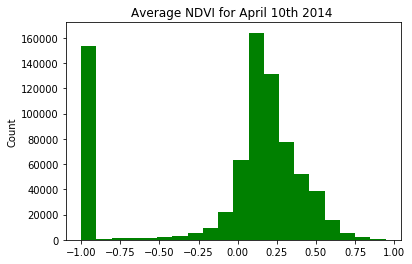

In [69]:
%matplotlib inline
fig, ax = plt.subplots()
ds['ndvi'].sel(time = '2014-04-10').plot.hist(bins=20, color = 'g', ax=ax ) 
ax.set_title("Average NDVI for April 10th 2014 ")

Text(0.5,1,'Average NDVI for April 26th 2014 ')

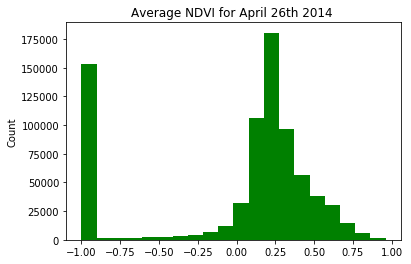

In [70]:
%matplotlib inline
fig, ax = plt.subplots()
ds['ndvi'].sel(time = '2014-04-26').plot.hist(bins=20, color = 'g', ax=ax ) 
ax.set_title("Average NDVI for April 26th 2014 ")

Text(0.5,1,'Average NDVI for April 29th 2015')

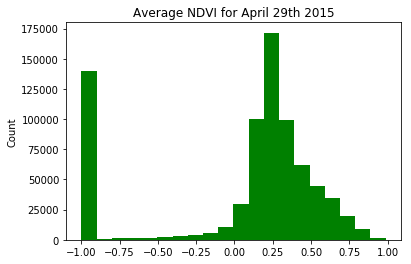

In [73]:
%matplotlib inline
fig, ax = plt.subplots()
ds['ndvi'].sel(time = '2015-04-29').plot.hist(bins=20, color = 'g', ax=ax ) 
ax.set_title("Average NDVI for April 29th 2015")

## 
The following two codes create the same histograms as the previous three, but these two are especially interesting because they do not share the same levels of -1 ndvi as the last three. This is because durring these next two observational days there were huge clouds over most of the waterways and land areas of NYC. This may explain the drop in -1 and concentration of 0.15 NDVI because clouds reflect light differently than land or large bodies of water and they also cast shadows on Earth's surface that may affect the NDVI calculations.

Text(0.5,1,'Average NDVI for April 13th 2015')

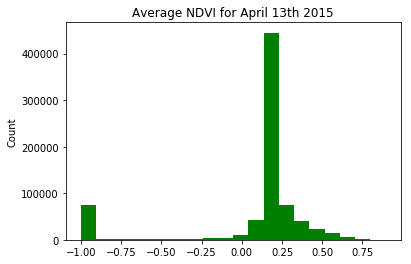

In [72]:
%matplotlib inline
fig, ax = plt.subplots()
ds['ndvi'].sel(time = '2015-04-13').plot.hist(bins=20, color = 'g', ax=ax ) 
ax.set_title("Average NDVI for April 13th 2015")

Text(0.5,1,'Average NDVI for May 31st 2015')

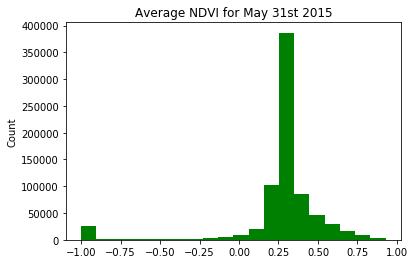

In [74]:
%matplotlib inline
fig, ax = plt.subplots()
ds['ndvi'].sel(time = '2015-05-31').plot.hist(bins=20, color = 'g', ax=ax ) 
ax.set_title("Average NDVI for May 31st 2015")

In [75]:
ds.time
#this code pulls up all the dates in the .nc file date set.

<xarray.DataArray 'time' (time: 21)>
array(['2014-04-10T00:00:00.000000000', '2014-04-26T00:00:00.000000000',
       '2014-06-29T00:00:00.000000000', '2014-07-31T00:00:00.000000000',
       '2014-08-16T00:00:00.000000000', '2014-09-01T00:00:00.000000000',
       '2014-09-17T00:00:00.000000000', '2014-10-03T00:00:00.000000000',
       '2014-11-04T00:00:00.000000000', '2015-01-07T00:00:00.000000000',
       '2015-01-23T00:00:00.000000000', '2015-02-24T00:00:00.000000000',
       '2015-03-12T00:00:00.000000000', '2015-04-13T00:00:00.000000000',
       '2015-04-29T00:00:00.000000000', '2015-05-31T00:00:00.000000000',
       '2015-08-03T00:00:00.000000000', '2015-08-19T00:00:00.000000000',
       '2015-10-06T00:00:00.000000000', '2015-10-22T00:00:00.000000000',
       '2015-11-23T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2014-04-10 2014-04-26 2014-06-29 ...

In [76]:
seasonNIR = dict(ds['NIR'].groupby('time.season'))
#this code creates a dictionary of the near infrared light values that is ordered by seasons.

In [77]:
seasonNIR['MAM']
#Now we are able to extract the NIR values for just the Spring. 'MAM' is the name of our season 
#because it refers to 'March, April, May.'

<xarray.DataArray 'NIR' (time: 6, y: 815, x: 921)>
[4503690 values with dtype=float64]
Coordinates:
    lat      (time, y, x) float64 40.88 40.88 40.88 40.88 40.88 40.88 40.88 ...
    lon      (time, y, x) float64 -74.07 -74.07 -74.07 -74.06 -74.06 -74.06 ...
  * time     (time) datetime64[ns] 2014-04-10 2014-04-26 2015-03-12 ...
Dimensions without coordinates: y, x

In [78]:
seasonRed = dict(ds['Red'].groupby('time.season')) 
#This code and the next one does the same thing as the last two but it is targeting the Red 
#wavelength values

In [79]:
seasonRed['MAM']

<xarray.DataArray 'Red' (time: 6, y: 815, x: 921)>
[4503690 values with dtype=float64]
Coordinates:
    lat      (time, y, x) float64 40.88 40.88 40.88 40.88 40.88 40.88 40.88 ...
    lon      (time, y, x) float64 -74.07 -74.07 -74.07 -74.06 -74.06 -74.06 ...
  * time     (time) datetime64[ns] 2014-04-10 2014-04-26 2015-03-12 ...
Dimensions without coordinates: y, x

In [80]:
seasonNDVI = (seasonNIR['MAM'] - seasonRed['MAM']) / (seasonNIR['MAM'] + seasonRed['MAM'])
seasonNDVI
#this code is calculating the general NDVI values for all the observations in spring that were 
#in the data file. 

<xarray.DataArray (time: 6, y: 815, x: 921)>
array([[[-0.134914, -1.      , ...,  0.270383,  0.259816],
        [-1.      , -1.      , ...,  0.27351 ,  0.326861],
        ..., 
        [ 0.446194,  0.502667, ..., -1.      , -1.      ],
        [ 0.503445,  0.546517, ..., -1.      , -1.      ]],

       [[ 0.080585,  0.044822, ...,  0.413414,  0.313589],
        [-0.03888 , -0.423391, ...,  0.294025,  0.324516],
        ..., 
        [ 0.356968,  0.436533, ..., -1.      , -1.      ],
        [ 0.559047,  0.650762, ..., -1.      , -1.      ]],

       ..., 
       [[ 0.139247, -0.028344, ...,  0.321345,  0.358968],
        [ 0.100724,  0.031493, ...,  0.361104,  0.39203 ],
        ..., 
        [ 0.649311,  0.80643 , ...,       nan,       nan],
        [ 0.75693 ,  0.802826, ..., -1.      ,       nan]],

       [[ 0.249576,  0.249442, ...,  0.541406,  0.368227],
        [ 0.26394 ,  0.265705, ...,  0.568822,  0.539045],
        ..., 
        [ 0.252704,  0.252128, ...,  0.223208,  0.2290

In [ ]:
%matplotlib inline
fig, ax = plt.subplots()
seasonNDVI.plot.hist(bins=20, color = 'g', ax=ax ) 
ax.set_title("General NDVI Throughout Spring")
 
#Using the last few lines of code, it is now 
#possible to create a Histogram of the general NDVI value for the season of Spring.


# NDVI GIF

## 
In the following few lines of code I used the template that was given to us in a Jupyter Notebook and modified so that it would return only maps of the NDVI values that were relevant to my group's season.

In [82]:
datestr = pd.to_datetime(seasonNDVI.time.values).strftime("%Y-%m-%d")#stringformatting time "Give me year, month and day"
num_frames = len(datestr)
#this code creates a set of date string values that will allow our next line of code to be 
#able to understand what values we need it to use for the GIF. 

In [83]:
%%capture 

# create figure
fig, ax = plt.subplots()
# plot the first tempF frame, 
# tell imshow the image is upside down
# use vmin, vmax, and cmap to make all images consistent
#the zero is what tells it to take the first temp
pcm = ax.imshow(seasonNDVI[0], vmin=-1, vmax= 1, cmap=cmap, 
                interpolation='none', origin='lower')
#create one colorbar that'll be used for all the images
cb = fig.colorbar(pcm)
#set the colorbar label, the xlabel, and the ylabel
cb.set_label(r"ndvi ($\degree F$)")
ax.set_title(datestr[0])
# animation function.  This is called sequentially
def animate(i):
    # we change the data being drawn
    # and use the tempF at index (time) i
    ax.set_title(datestr[i])
    pcm.set_data(seasonNDVI[i].values)
    return [pcm]

In [49]:
ani = animation.FuncAnimation(fig, animate, frames=range(0,num_frames))
HTML(ani.to_jshtml())
#This code creates the animation of the maps and shows them one after another

# Finding a Co-relation

In [41]:
seasontemp = dict(ds['tempF'].groupby('time.season')) 
#in this code I created a dictionary of the temperatures in degree farenheit that is ordered by 
#season.l

In [42]:
spring_season_temp = seasontemp['MAM']
spring_season_temp
#In this code I assigned all the temperatures of the Spring season to a a variable.
#It has only 6 times because we only have six observaional days worth of data. 

<xarray.DataArray 'tempF' (time: 6, y: 815, x: 921)>
array([[[ 47.724198,  46.251754, ...,  52.033189,  51.778576],
        [ 45.388656,  44.020242, ...,  51.995782,  51.763581],
        ..., 
        [ 53.519369,  53.63005 , ...,  37.14069 ,  37.149311],
        [ 53.438135,  53.475067, ...,  37.14069 ,  37.149311]],

       [[ 49.053955,  47.630812, ...,  54.012914,  53.976156],
        [ 47.240833,  45.864624, ...,  53.887888,  53.836367],
        ..., 
        [ 50.215763,  50.527058, ...,  38.89243 ,  38.790738],
        [ 50.382908,  50.67102 , ...,  38.909368,  38.81617 ]],

       ..., 
       [[ 49.353225,  47.996112, ...,  61.023223,  60.78753 ],
        [ 46.590326,  45.412505, ...,  60.953949,  60.725064],
        ..., 
        [ 59.65816 ,  59.75618 , ...,  41.723532,  41.740002],
        [ 59.496955,  59.623134, ...,  41.682344,  41.698821]],

       [[ 43.78639 ,  43.907414, ...,  59.965952,  59.616128],
        [ 43.600547,  43.584371, ...,  59.951978,  59.637146],
    

In [53]:
df = pd.concat((spring_season_temp.to_dataframe(name='temp').reset_index(), 
           seasonNDVI.to_dataframe(name='ndvi').reset_index()))
#This code combines the values of the NDVI and the temperature data into one big set 
#which allows us to manipulate it further 

In [54]:
df

,lat,lon,ndvi,temp,time,x,y
0,40.8796,-74.0661,NaN,47.724198,2014-04-10,0,0
1,40.8796,-74.0658,NaN,46.251754,2014-04-10,1,0
2,40.8796,-74.0654,NaN,44.934494,2014-04-10,2,0
3,40.8796,-74.0650,NaN,43.762168,2014-04-10,3,0
4,40.8796,-74.0647,NaN,42.845685,2014-04-10,4,0
5,40.8796,-74.0643,NaN,42.674468,2014-04-10,5,0
6,40.8796,-74.0640,NaN,42.658147,2014-04-10,6,0
7,40.8796,-74.0636,NaN,42.322992,2014-04-10,7,0
8,40.8796,-74.0632,NaN,42.003168,2014-04-10,8,0
9,40.8796,-74.0629,NaN,41.723532,2014-04-10,9,0


In [56]:
df[['temp','ndvi']].corr()


,temp,ndvi
temp,1,NaN
ndvi,NaN,1


##
The previous code investigates if their is any correlation between the average temperature and the average NDVI in NYC. There is a correlation of 1 between the two 'temp' values and the two 'ndvi' values because they are the same data. However, there is no detected correlation between the temperature andthe NDVI for the season of Spring. This may be due to the fact that we do not have enough data for the entire season. 